<a href="https://colab.research.google.com/github/sattwiksuman/Digital_Operations_and_Supply_Chain_Management/blob/main/XYZ_Analysis_trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
from random import random

In [2]:
df_demand_Q1 = pd.read_excel('/content/210224_01_Demand and delivery quantities Q1 2017.xlsx')

In [3]:
df_demand_Q2 = pd.read_excel('/content/210224_01_Demand and delivery quantities Q2 2017.xlsx')

In [4]:
df_demand_Q3 = pd.read_excel('/content/210224_01_Demand and delivery quantities Q3 2017.xlsx')

In [5]:
df_demand_Q4 = pd.read_excel('/content/210224_02_Demand and delivery quantities Q4 2017.xlsx')

In [6]:
frames = [df_demand_Q1, df_demand_Q2, df_demand_Q3, df_demand_Q4]
df_demand = pd.concat(frames, axis=0, join="outer", ignore_index=True)

In [7]:
df_inventory = pd.read_excel('/content/210224_01_Inventory palletts.xlsx')

In [8]:
df_demand.describe()

,Kunden-Nr.,Artikel-Nr.,Menge,Stat.Menge
count,7.067990e+05,706799.000000,706799.000000,706799.000000
mean,1.111852e+09,14206.456138,62.397938,719.994373
std,2.677478e+08,5805.159665,150.690666,1714.722498
min,1.130220e+08,10002.000000,-185.000000,-2220.000000
25%,1.080001e+09,10272.000000,5.000000,60.000000
50%,1.080001e+09,10409.000000,15.000000,180.000000
75%,1.080003e+09,20330.000000,40.000000,480.000000
max,4.230009e+09,40197.000000,4872.000000,30720.000000


In [9]:
df_demand.head()

,Kunden-Nr.,Artikel-Nr.,Belegdatum,Beleg-Nr.,Menge,Stat.Menge
0,1010020003,10002,2017-02-01,L117006002,48.0,1152.0
1,1010020004,10002,2017-02-02,L117006051,72.0,1728.0
2,1010030001,10002,2017-02-01,L117006054,96.0,2304.0
3,1010030002,10002,2017-01-03,L117000029,1.0,24.0
4,1010030002,10002,2017-01-09,L117000131,1.0,24.0


In [10]:
df_demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706799 entries, 0 to 706798
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Kunden-Nr.   706799 non-null  int64         
 1   Artikel-Nr.  706799 non-null  int64         
 2   Belegdatum   706799 non-null  datetime64[ns]
 3   Beleg-Nr.    706794 non-null  object        
 4   Menge        706799 non-null  float64       
 5   Stat.Menge   706799 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 32.4+ MB


In [11]:
df_demand.sort_values(by='Belegdatum', ignore_index=True, inplace=True)

In [12]:
df_demand.head()

,Kunden-Nr.,Artikel-Nr.,Belegdatum,Beleg-Nr.,Menge,Stat.Menge
0,1190022000,10101,2017-01-02,L117000262,36.0,432.0
1,1080002048,10276,2017-01-02,L117000221,5.0,60.0
2,1080001224,10238,2017-01-02,L117000191,5.0,60.0
3,1080001216,10327,2017-01-02,L117000160,5.0,60.0
4,1080001152,10414,2017-01-02,L117000009,5.0,60.0


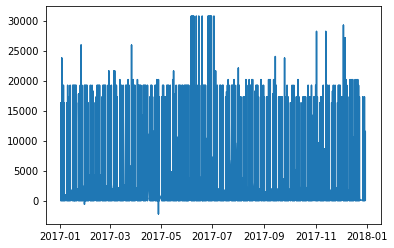

In [13]:
plt.plot(df_demand.loc[:]['Belegdatum'], df_demand.loc[:]['Stat.Menge'])

In [14]:
#Algorithm for XYZ analysis:
'''
1. Find a list of all the articles
2. Group by articles and have columns for sum and count and mean
3. For each article:
        find mean sales #done already in previous step!
        variance coefficient = vm = sqrt((1/n)* (Stat.Menge - mean)**2)/mean
        Append this value to the group by table generated in step 2
4. Sort the grouped article table as per increasing order of variance
5. Add a column 'Class' and initiate it as 'Class Y'
6. If df_grouped['vm'] < =0.5 : df_grouped['Class']='Class X'
7. If df_grouped['vm'] > 1 : df_grouped['Class']='Class Z'
'''

"\n1. Find a list of all the articles\n2. Group by articles and have columns for sum and count and mean\n3. For each article:\n        find mean sales #done already in previous step!\n        variance coefficient = vm = sqrt((1/n)* (Stat.Menge - mean)**2)/mean\n        Append this value to the group by table generated in step 2\n4. Sort the grouped article table as per increasing order of variance\n5. Add a column 'Class' and initiate it as 'Class Y'\n6. If df_grouped['vm'] < =0.5 : df_grouped['Class']='Class X'\n7. If df_grouped['vm'] > 1 : df_grouped['Class']='Class Z'\n"

In [15]:
df_demand['Artikel-Nr.'].value_counts()   #number of articles

10408    22321
20210    22192
10101    21530
20230    19108
20381    18038
         ...  
11580        2
11588        2
11560        1
10348        1
10346        1
Name: Artikel-Nr., Length: 215, dtype: int64

<BarContainer object of 215 artists>

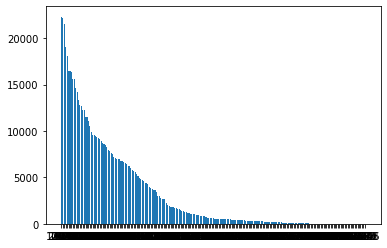

In [16]:
#track number of articles and their percentage share 
df_article_abc = df_demand['Artikel-Nr.'].value_counts().rename_axis('Article_Num').reset_index(name='ABC')
df_article_abc['Article_Num']= df_article_abc['Article_Num'].astype(str)
plt.bar(df_article_abc['Article_Num'], df_article_abc['ABC'])

In [17]:
len(df_demand['Kunden-Nr.'].value_counts())    #number of customers

767

In [18]:
articles = df_demand['Artikel-Nr.'].unique()   #list of all articles

In [19]:
len(articles)

215

In [20]:
article_group = df_demand.groupby(['Artikel-Nr.'])

In [21]:
article_group['Stat.Menge'].mean()

Artikel-Nr.
10002     437.485714
10003    1864.563895
10004     957.845854
10006     506.212987
10007    1085.680182
            ...     
40193      58.285714
40194      57.428571
40195      47.763547
40196      52.210526
40197      51.900000
Name: Stat.Menge, Length: 215, dtype: float64

In [22]:
dummy_df = article_group.get_group(10408).copy()

In [23]:
dummy_df.head()

,Kunden-Nr.,Artikel-Nr.,Belegdatum,Beleg-Nr.,Menge,Stat.Menge
324,1050010000,10408,2017-01-02,L117000297,560.0,6720.0
597,1080002055,10408,2017-01-02,L117000077,40.0,480.0
602,1080002052,10408,2017-01-02,L117000227,40.0,480.0
604,1080002049,10408,2017-01-02,L117000215,40.0,480.0
607,1080002048,10408,2017-01-02,L117000221,120.0,1440.0


In [24]:
dummy_df.sort_values(by='Belegdatum', ignore_index=True, inplace=True)

In [25]:
dummy_df.head()

,Kunden-Nr.,Artikel-Nr.,Belegdatum,Beleg-Nr.,Menge,Stat.Menge
0,1050010000,10408,2017-01-02,L117000297,560.0,6720.0
1,1080001136,10408,2017-01-02,L117000105,40.0,480.0
2,1080001152,10408,2017-01-02,L117000009,40.0,480.0
3,1080001159,10408,2017-01-02,L117000050,80.0,960.0
4,1080001269,10408,2017-01-02,L117000175,40.0,480.0


In [26]:
dummy_df.set_index(pd.DatetimeIndex(dummy_df['Belegdatum']))

,Kunden-Nr.,Artikel-Nr.,Belegdatum,Beleg-Nr.,Menge,Stat.Menge
Belegdatum,,,,,,
2017-01-02,1050010000,10408,2017-01-02,L117000297,560.0,6720.0
2017-01-02,1080001136,10408,2017-01-02,L117000105,40.0,480.0
2017-01-02,1080001152,10408,2017-01-02,L117000009,40.0,480.0
2017-01-02,1080001159,10408,2017-01-02,L117000050,80.0,960.0
2017-01-02,1080001269,10408,2017-01-02,L117000175,40.0,480.0
...,...,...,...,...,...,...
2017-12-30,1080001201,10408,2017-12-30,L117088082,40.0,480.0
2017-12-30,1080001113,10408,2017-12-30,L117088084,40.0,480.0
2017-12-30,1080002005,10408,2017-12-30,L117088114,40.0,480.0


In [27]:
dummy_df.index=dummy_df['Belegdatum']
weekly_val = dummy_df.groupby(pd.Grouper(freq='W'))['Stat.Menge'].sum().reset_index()

In [28]:
weekly_val

,Belegdatum,Stat.Menge
0,2017-01-08,724476.0
1,2017-01-15,702492.0
2,2017-01-22,899928.0
3,2017-01-29,1120812.0
4,2017-02-05,1094664.0
5,2017-02-12,1070976.0
6,2017-02-19,1194780.0
7,2017-02-26,1090356.0
8,2017-03-05,870852.0
9,2017-03-12,1012764.0


In [29]:
bi_weekly_val = dummy_df.groupby(pd.Grouper(freq='14D'))['Stat.Menge'].sum().reset_index()

In [30]:
bi_weekly_val

,Belegdatum,Stat.Menge
0,2017-01-02,1426968.0
1,2017-01-16,2020740.0
2,2017-01-30,2165640.0
3,2017-02-13,2285136.0
4,2017-02-27,1883616.0
5,2017-03-13,2090736.0
6,2017-03-27,2536464.0
7,2017-04-10,2270808.0
8,2017-04-24,1969164.0
9,2017-05-08,2142180.0


In [31]:
sum_sold = weekly_val['Stat.Menge'].sum()

In [32]:
mean_sold = weekly_val['Stat.Menge'].mean()

In [33]:
std_sold = weekly_val['Stat.Menge'].std(ddof=0)

In [34]:
print (sum_sold, mean_sold, std_sold)

54666156.0 1051272.2307692308 224011.425751749


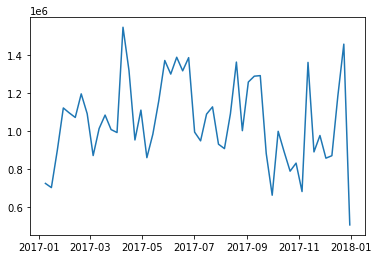

In [76]:
plt.plot(weekly_val['Belegdatum'], weekly_val['Stat.Menge'])

In [35]:
df_article_grouped = df_demand.groupby(['Artikel-Nr.'])['Stat.Menge'].sum().reset_index().copy()

In [36]:
df_article_grouped['Sum']='NAN'
df_article_grouped['Mean']='NAN'
df_article_grouped['Std']='NAN'

In [37]:
df_article_grouped.head()

,Artikel-Nr.,Stat.Menge,Sum,Mean,Std
0,10002,15312.0,NAN,NAN,NAN
1,10003,3676920.0,NAN,NAN,NAN
2,10004,981792.0,NAN,NAN,NAN
3,10006,584676.0,NAN,NAN,NAN
4,10007,2383068.0,NAN,NAN,NAN


In [38]:
df_article_grouped.loc[df_article_grouped['Artikel-Nr.']==10545, 'Sum']=sum_sold

In [39]:
df_article_grouped[df_article_grouped['Artikel-Nr.']==10545]['Sum']

83    5.46662e+07
Name: Sum, dtype: object

In [40]:
def XYZ_Analysis(df, XYZ_on, according_to, date_column):
    items = df[XYZ_on].unique()   #list of all articles
    items_group = df.groupby([XYZ_on])
    df_items_grouped = df.groupby(XYZ_on)[according_to].sum().reset_index().copy()
    df_items_grouped['Sum']='NAN'
    df_items_grouped['Mean']='NAN'
    df_items_grouped['Std']='NAN'
    for item in items:
        dummy_df = items_group.get_group(item).copy()
        dummy_df.sort_values(by=date_column, ignore_index=True, inplace=True)
        dummy_df.index=dummy_df[date_column]
        weekly_val = dummy_df.groupby(pd.Grouper(freq='W'))[according_to].sum().reset_index()
        sum_sold = weekly_val[according_to].sum()
        mean_sold = weekly_val[according_to].mean()
        std_sold = weekly_val[according_to].std(ddof=0)
        df_items_grouped.loc[df_article_grouped[XYZ_on]==item, 'Sum']=sum_sold
        df_items_grouped.loc[df_article_grouped[XYZ_on]==item, 'Mean']=mean_sold
        df_items_grouped.loc[df_article_grouped[XYZ_on]==item, 'Std']=std_sold
    df_items_grouped['Variance_Coeff']=df_items_grouped['Std']/df_items_grouped['Mean']
    df_items_grouped.sort_values(by='Variance_Coeff', ascending=True, ignore_index=True, inplace=True)
    df_items_grouped['Class']='Class Y'
    df_items_grouped.loc[df_items_grouped['Variance_Coeff']<=0.5, ['Class']]='Class X'
    df_items_grouped.loc[df_items_grouped['Variance_Coeff']>1, ['Class']]='Class Z'
    return(df_items_grouped)

In [41]:
df_articles_XYZ = XYZ_Analysis(df_demand, 'Artikel-Nr.', 'Stat.Menge', 'Belegdatum')

In [47]:
df_articles_XYZ.head()

,Artikel-Nr.,Stat.Menge,Sum,Mean,Std,Variance_Coeff,Class
0,10408,54666156.0,5.46662e+07,1.05127e+06,224011,0.213086,Class X
1,10101,35821248.0,3.58212e+07,688870,166256,0.241346,Class X
2,10407,31911372.0,3.19114e+07,613680,149174,0.243081,Class X
3,20410,49738548.0,4.97385e+07,956511,143935,0.150479,Class X
4,10100,20949888.0,2.09499e+07,402882,112902,0.280236,Class X


In [43]:
df_articles_XYZ.sort_values(by='Std', ascending=False, ignore_index=True, inplace=True)

In [48]:
df_articles_XYZ['Sum'].sum()

508891303.0

In [49]:
df_demand['Stat.Menge'].sum()

508891303.0



---
#ABC_XYZ_Analysis
---




In [62]:
#Define Function for ABC_XYZ analysis
def ABC_XYZ_Analysis(df, XYZ_on, according_to, date_column):
    items = df[XYZ_on].unique()   #list of all articles
    items_group = df.groupby([XYZ_on])
    df_items_grouped = df.groupby(XYZ_on)[according_to].sum().reset_index().copy()
    df_items_grouped['Sum']='NAN'
    df_items_grouped['Mean']='NAN'
    df_items_grouped['Std']='NAN'
    for item in items:
        dummy_df = items_group.get_group(item).copy()
        dummy_df.sort_values(by=date_column, ignore_index=True, inplace=True)
        dummy_df.index=dummy_df[date_column]
        weekly_val = dummy_df.groupby(pd.Grouper(freq='W'))[according_to].sum().reset_index()
        sum_sold = weekly_val[according_to].sum()
        mean_sold = weekly_val[according_to].mean()
        std_sold = weekly_val[according_to].std(ddof=0)
        df_items_grouped.loc[df_article_grouped[XYZ_on]==item, 'Sum']=sum_sold
        df_items_grouped.loc[df_article_grouped[XYZ_on]==item, 'Mean']=mean_sold
        df_items_grouped.loc[df_article_grouped[XYZ_on]==item, 'Std']=std_sold
    df_items_grouped['Variance_Coeff']=df_items_grouped['Std']/df_items_grouped['Mean']
    df_items_grouped.sort_values(by='Variance_Coeff', ascending=True, ignore_index=True, inplace=True)
    df_items_grouped['Class_XYZ']='Class Y'
    df_items_grouped.loc[df_items_grouped['Variance_Coeff']<=0.5, ['Class_XYZ']]='Class X'
    df_items_grouped.loc[df_items_grouped['Variance_Coeff']>1, ['Class_XYZ']]='Class Z'
    df_items_grouped['Percent_Sales'] = 100*df_items_grouped['Sum']/df_items_grouped['Sum'].sum()
    df_items_grouped.sort_values(by='Percent_Sales', ascending=False, ignore_index=True, inplace=True)
    df_items_grouped['Cumulative_Sales_Percentage'] = df_items_grouped['Percent_Sales'].cumsum()
    df_items_grouped['Class_ABC']='Class B'
    df_items_grouped.loc[df_items_grouped['Cumulative_Sales_Percentage']<=80, ['Class_ABC']]='Class A'
    df_items_grouped.loc[df_items_grouped['Cumulative_Sales_Percentage']>95, ['Class_ABC']]='Class C'
    df_items_grouped['Class_ABC_XYZ'] = 'TBD'
    df_items_grouped.loc[(df_items_grouped['Class_ABC']=='Class A') & (df_items_grouped['Class_XYZ']=='Class X'), ['Class_ABC_XYZ']]='A/X'
    df_items_grouped.loc[(df_items_grouped['Class_ABC']=='Class A') & (df_items_grouped['Class_XYZ']=='Class Y'), ['Class_ABC_XYZ']]='A/Y'
    df_items_grouped.loc[(df_items_grouped['Class_ABC']=='Class A') & (df_items_grouped['Class_XYZ']=='Class Z'), ['Class_ABC_XYZ']]='A/Z'
    df_items_grouped.loc[(df_items_grouped['Class_ABC']=='Class B') & (df_items_grouped['Class_XYZ']=='Class X'), ['Class_ABC_XYZ']]='B/X'
    df_items_grouped.loc[(df_items_grouped['Class_ABC']=='Class B') & (df_items_grouped['Class_XYZ']=='Class Y'), ['Class_ABC_XYZ']]='B/Y'
    df_items_grouped.loc[(df_items_grouped['Class_ABC']=='Class B') & (df_items_grouped['Class_XYZ']=='Class Z'), ['Class_ABC_XYZ']]='B/Z'
    df_items_grouped.loc[(df_items_grouped['Class_ABC']=='Class C') & (df_items_grouped['Class_XYZ']=='Class X'), ['Class_ABC_XYZ']]='C/X'
    df_items_grouped.loc[(df_items_grouped['Class_ABC']=='Class C') & (df_items_grouped['Class_XYZ']=='Class Y'), ['Class_ABC_XYZ']]='C/Y'
    df_items_grouped.loc[(df_items_grouped['Class_ABC']=='Class C') & (df_items_grouped['Class_XYZ']=='Class Z'), ['Class_ABC_XYZ']]='C/Z'
    return(df_items_grouped)

In [63]:
df_articles_ABC_XYZ = ABC_XYZ_Analysis(df_demand, 'Artikel-Nr.', 'Stat.Menge', 'Belegdatum')

In [64]:
df_articles_ABC_XYZ.head()

,Artikel-Nr.,Stat.Menge,Sum,Mean,Std,Variance_Coeff,Class_XYZ,Percent_Sales,Cumulative_Sales_Percentage,Class_ABC,Class_ABC_XYZ
0,10408,54666156.0,5.46662e+07,1.05127e+06,224011,0.213086,Class X,10.7422,10.7422,Class A,A/X
1,20410,49738548.0,4.97385e+07,956511,143935,0.150479,Class X,9.7739,20.5161,Class A,A/X
2,10101,35821248.0,3.58212e+07,688870,166256,0.241346,Class X,7.03908,27.5552,Class A,A/X
3,10407,31911372.0,3.19114e+07,613680,149174,0.243081,Class X,6.27076,33.826,Class A,A/X
4,20210,30988272.0,3.09883e+07,595928,88277.8,0.148135,Class X,6.08937,39.9153,Class A,A/X


In [68]:
df_articles_ABC_XYZ['Class_ABC_XYZ'].value_counts()

C/Z    64
C/X    49
B/X    38
C/Y    37
A/X    24
B/Y     3
Name: Class_ABC_XYZ, dtype: int64

In [70]:
df_articles_ABC_XYZ[df_articles_ABC_XYZ['Class_ABC_XYZ']=='B/Y']

,Artikel-Nr.,Stat.Menge,Sum,Mean,Std,Variance_Coeff,Class_XYZ,Percent_Sales,Cumulative_Sales_Percentage,Class_ABC,Class_ABC_XYZ
43,20350,1863720.0,1.86372e+06,35840.8,19076,0.532244,Class Y,0.366231,90.2348,Class B,B/Y
50,20310,1269732.0,1.26973e+06,24417.9,15849.1,0.649075,Class Y,0.249509,92.2363,Class B,B/Y
63,20330,825372.0,825372,15872.5,10895.7,0.686448,Class Y,0.16219,94.7617,Class B,B/Y


In [71]:
df_articles_ABC_XYZ.to_excel('/content/Articles_ABC_XYZ_Analysis.xls')

In [114]:
#Plotting one article from each class:

#Make list of articles in each class = 9 lists
articles_AX = df_articles_ABC_XYZ[df_articles_ABC_XYZ['Class_ABC_XYZ']=='A/X']['Artikel-Nr.'].tolist()
articles_AY = df_articles_ABC_XYZ[df_articles_ABC_XYZ['Class_ABC_XYZ']=='A/Y']['Artikel-Nr.'].tolist()
articles_AZ = df_articles_ABC_XYZ[df_articles_ABC_XYZ['Class_ABC_XYZ']=='A/Z']['Artikel-Nr.'].tolist()
articles_BX = df_articles_ABC_XYZ[df_articles_ABC_XYZ['Class_ABC_XYZ']=='B/X']['Artikel-Nr.'].tolist()
articles_BY = df_articles_ABC_XYZ[df_articles_ABC_XYZ['Class_ABC_XYZ']=='B/Y']['Artikel-Nr.'].tolist()
articles_BZ = df_articles_ABC_XYZ[df_articles_ABC_XYZ['Class_ABC_XYZ']=='B/Z']['Artikel-Nr.'].tolist()
articles_CX = df_articles_ABC_XYZ[df_articles_ABC_XYZ['Class_ABC_XYZ']=='C/X']['Artikel-Nr.'].tolist()
articles_CY = df_articles_ABC_XYZ[df_articles_ABC_XYZ['Class_ABC_XYZ']=='C/Y']['Artikel-Nr.'].tolist()
articles_CZ = df_articles_ABC_XYZ[df_articles_ABC_XYZ['Class_ABC_XYZ']=='C/Z']['Artikel-Nr.'].tolist()
max_articles = {'A/X': articles_AX, 'A/Y': articles_AY, 'A/Z': articles_AZ, 
                'B/X': articles_BX, 'B/Y': articles_BZ, 'B/Z': articles_BZ,
                'C/X': articles_CX, 'C/Y': articles_CY, 'C/Z': articles_CZ}

In [178]:
#From each list select the article with max(Variance_Coeff)
max_vc = df_articles_ABC_XYZ.groupby('Class_ABC_XYZ')['Variance_Coeff'].max()

In [172]:
max_vc

Class_ABC_XYZ
A/X    0.462829
B/X    0.477461
B/Y    0.686448
C/X    0.498857
C/Y    0.996642
C/Z    3.482097
Name: Variance_Coeff, dtype: float64

In [181]:
item = 'B/Y'
item_max_vc = df_articles_ABC_XYZ[(df_articles_ABC_XYZ['Artikel-Nr.'].isin(max_articles[item])) \
                                        & (df_articles_ABC_XYZ['Variance_Coeff']==max_vc[item])]['Artikel-Nr.']

In [182]:
item_max_vc

Series([], Name: Artikel-Nr., dtype: int64)

In [185]:
import random

In [193]:
df_articles_ABC_XYZ[(df_articles_ABC_XYZ['Artikel-Nr.'].isin(max_articles['B/Y'])]['Artikel-Nr.']

SyntaxError: ignored

In [188]:
item = 'B/Y'
item_max_vcs = df_articles_ABC_XYZ[(df_articles_ABC_XYZ['Artikel-Nr.'].isin(max_articles[item])]['Artikel-Nr.']
item_max_vc = random.choice(item_max_vcs) 
items_group = df_demand.groupby(['Artikel-Nr.'])
dummy_df = items_group.get_group(item_max_vc.values[0]).copy()
dummy_df.sort_values(by='Belegdatum', ignore_index=True, inplace=True)
dummy_df.index=dummy_df['Belegdatum']
weekly_val = dummy_df.groupby(pd.Grouper(freq='W'))['Stat.Menge'].sum().reset_index()
plt.plot(weekly_val['Belegdatum'], weekly_val['Stat.Menge'])

SyntaxError: ignored

In [140]:
item_max_vc.values[0]

10207

In [127]:
type(items_group)

pandas.core.groupby.generic.DataFrameGroupBy

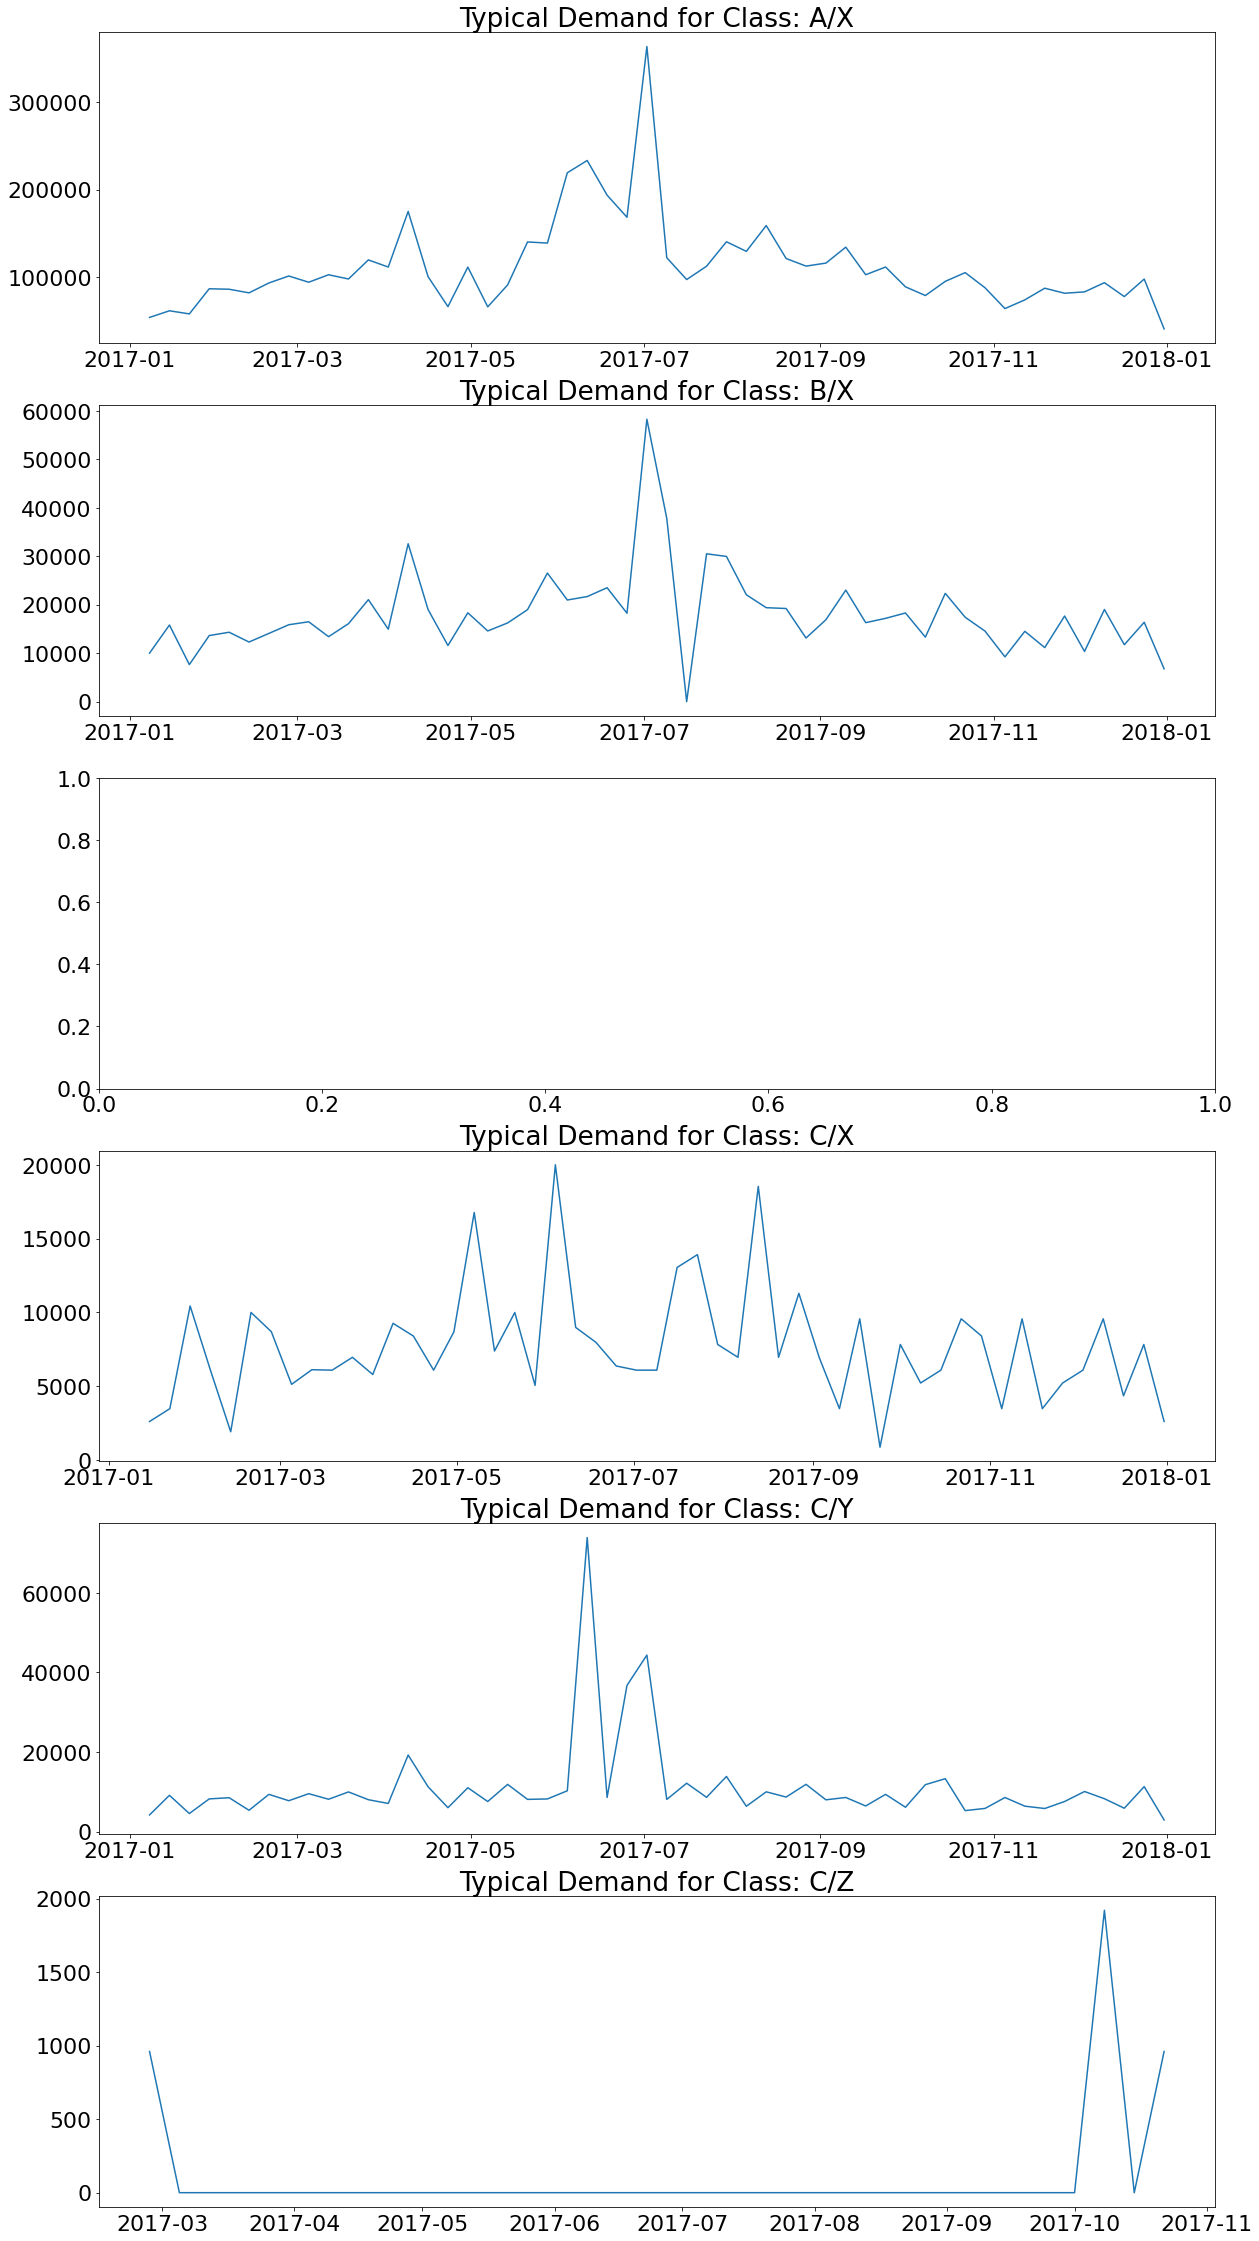

In [184]:
fig, axs = plt.subplots(nrows=len(max_vc.index), ncols=1, figsize=(20, 40))
plt.rcParams.update({'font.size': 22})
#fig.tight_layout()
for i, item in enumerate(max_vc.index):
    try:
        item_max_vc = df_articles_ABC_XYZ[(df_articles_ABC_XYZ['Artikel-Nr.'].isin(max_articles[item])) \
                                            & (df_articles_ABC_XYZ['Variance_Coeff']==max_vc[item])]['Artikel-Nr.']
        items_group = df_demand.groupby('Artikel-Nr.')
        dummy_df = items_group.get_group(item_max_vc.values[0]).copy()
        dummy_df.sort_values(by='Belegdatum', ignore_index=True, inplace=True)
        dummy_df.index=dummy_df['Belegdatum']
        weekly_val = dummy_df.groupby(pd.Grouper(freq='W'))['Stat.Menge'].sum().reset_index()
        axs[i].plot(weekly_val['Belegdatum'], weekly_val['Stat.Menge'])
        axs[i].set_title(f'Typical Demand for Class: {item}')
    except:
        try:
            item_max_vc = random.choice(max_articles[item])
            items_group = df_demand.groupby('Artikel-Nr.')
            dummy_df = items_group.get_group(item_max_vc.values[0]).copy()
            dummy_df.sort_values(by='Belegdatum', ignore_index=True, inplace=True)
            dummy_df.index=dummy_df['Belegdatum']
            weekly_val = dummy_df.groupby(pd.Grouper(freq='W'))['Stat.Menge'].sum().reset_index()
            axs[i].plot(weekly_val['Belegdatum'], weekly_val['Stat.Menge'])
            axs[i].set_title(f'Typical Demand for Class: {item}')
        except:
            pass
plt.show()

IndexError: ignored

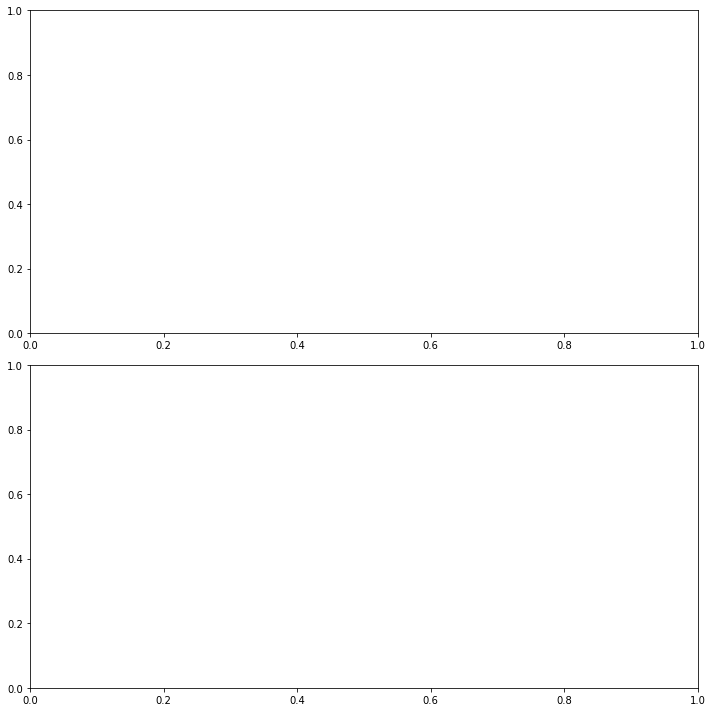

In [166]:
x=[1,2,3]
y=[10, 20, 30]
fi, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))
fi.tight_layout()
for i in range(2):
    ax[i,0].plot(x,y)
plt.show()

In [103]:
for item in max_vc.index:
    try:
        item_max_vc = df_articles_ABC_XYZ[(df_articles_ABC_XYZ['Artikel-Nr.'].isin(max_articles[item])) & (df_articles_ABC_XYZ['Variance_Coeff']==max_vc[item])]['Artikel-Nr.']
        dummy_df = article_group.get_group(ax_article_max_vc).copy()
        dummy_df.sort_values(by=date_column, ignore_index=True, inplace=True)
        dummy_df.index=dummy_df[date_column]
        weekly_val = dummy_df.groupby(pd.Grouper(freq='W'))[according_to].sum().reset_index()
        plt.plot(weekly_val['Belegdatum'], weekly_val['Stat.Menge'])
    except:
        pass
try:
    ay_article_max_vc = df_articles_ABC_XYZ[(df_articles_ABC_XYZ['Artikel-Nr.'].isin(ay_articles)) & (df_articles_ABC_XYZ['Variance_Coeff']==max_vc['A/Y'])]['Artikel-Nr.']
except:
    pass
try:
    az_article_max_vc = df_articles_ABC_XYZ[(df_articles_ABC_XYZ['Artikel-Nr.'].isin(az_articles)) & (df_articles_ABC_XYZ['Variance_Coeff']==max_vc['A/Z'])]['Artikel-Nr.']
except:
    pass
try:
    bx_article_max_vc = df_articles_ABC_XYZ[(df_articles_ABC_XYZ['Artikel-Nr.'].isin(bx_articles)) & (df_articles_ABC_XYZ['Variance_Coeff']==max_vc['B/X'])]['Artikel-Nr.']
except:
    pass
try:
    by_article_max_vc = df_articles_ABC_XYZ[(df_articles_ABC_XYZ['Artikel-Nr.'].isin(by_articles)) & (df_articles_ABC_XYZ['Variance_Coeff']==max_vc['B/Y'])]['Artikel-Nr.']
except:
    pass
try:
    bz_article_max_vc = df_articles_ABC_XYZ[(df_articles_ABC_XYZ['Artikel-Nr.'].isin(bz_articles)) & (df_articles_ABC_XYZ['Variance_Coeff']==max_vc['B/Z'])]['Artikel-Nr.']
except:
    pass
try:
    cx_article_max_vc = df_articles_ABC_XYZ[(df_articles_ABC_XYZ['Artikel-Nr.'].isin(cx_articles)) & (df_articles_ABC_XYZ['Variance_Coeff']==max_vc['C/X'])]['Artikel-Nr.']
except:
    pass
try:
    cy_article_max_vc = df_articles_ABC_XYZ[(df_articles_ABC_XYZ['Artikel-Nr.'].isin(cy_articles)) & (df_articles_ABC_XYZ['Variance_Coeff']==max_vc['C/Y'])]['Artikel-Nr.']
except:
    pass
try:
    cz_article_max_vc = df_articles_ABC_XYZ[(df_articles_ABC_XYZ['Artikel-Nr.'].isin(cz_articles)) & (df_articles_ABC_XYZ['Variance_Coeff']==max_vc['C/Z'])]['Artikel-Nr.']
except:
    pass

In [98]:
ax_article_max_vc

19    10207
Name: Artikel-Nr., dtype: int64

In [ ]:
#Plot the Weekly Sales for that article from df_demand

In [88]:
len(ax_articles)

24

###Demand Situation:
order data: XYZ analysis- perform XYZ analysis and interpretate the findings. 

Try to find if something is going wrong with the company

Have data such that the inventory data is compared to the sales figures in the two week buckets

what is special about the beverage market

perishable articles should not be stored so should not be a lot of difference between inventory and demand

Q3 and A4 data will be uploaded.




##Making the dataframe comparing sales and inventory:


1.   Aggregate total sales grouped by Artikel-Nr. from df_demand
2.   Resample the data biweekly
1.   Import the inventory_pallet excel file as a dataframe
2.   Add the biweekly demand information to the suitable biweekly inventory column in the inventory_pallet dataframe

Note: The inventory pallet dataframe has values arranged as columns










